## Digital Image Processing Exercise 1_2

Amirkabir University of Technology

Dr. Rahmati 

By Gholamrezadar 400131018

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")

## A

In [22]:
grayscale_1 = cv2.imread('inputs/P2/grayscale1.png', 0)
grayscale_2 = cv2.imread('inputs/P2/grayscale2.png', 0)

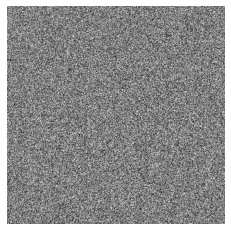

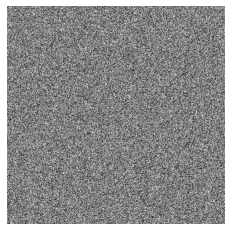

In [23]:
plt.axis('off')
plt.imshow(grayscale_1, cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(grayscale_2, cmap='gray')
plt.show()


### SLOW WARNING
you have to have a folder named result in the current directory

Change the for loop range to (-500,500) to see the whole process

In [29]:
for k in range(48,59):
# for k in range(-500,500):
    temp = np.zeros_like(grayscale_1)
    for i in range(0, grayscale_1.shape[0]):
        for j in range(0, grayscale_1.shape[1]):
            if j+k>0 and j+k<500:
                temp[j,i] = int(grayscale_2[j+k,i]) - int(grayscale_1[j,i])
            else:
                temp[j,i] = grayscale_1[j,i]
    cv2.imwrite('results6/'+str(k+500)+'.png', temp)

## B

(1200, 1600, 3)


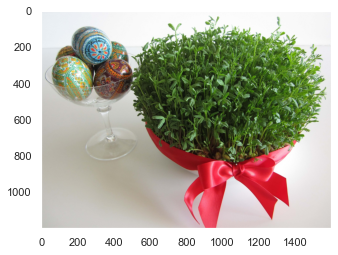

(1200, 1600, 3)


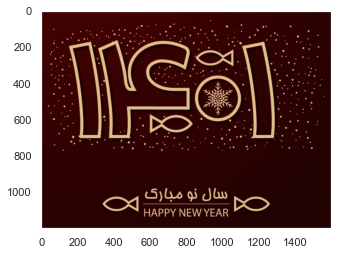

In [2]:
img = cv2.imread('inputs/P2/img.png')
img_org = img.copy()
msg = cv2.imread('inputs/P2/msg.png')

msg = cv2.resize(msg, (img.shape[1], img.shape[0]))

print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


print(msg.shape)
plt.imshow(cv2.cvtColor(msg, cv2.COLOR_BGR2RGB))
plt.show()

### Binarize message

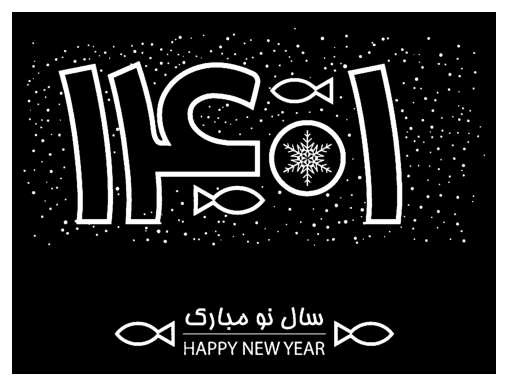

In [5]:
# threshold msg image
ret, msg_thresh = cv2.threshold(msg, 64, 255, cv2.THRESH_BINARY)
msg_thresh = msg_thresh[:,:,0]
# msg_thresh = cv2.cvtColor(msg_thresh, cv2.COLOR_BGR2GRAY)
plt.figure(dpi=120)
plt.axis('off')
plt.imshow(msg_thresh, cmap='gray')


In [6]:
print(f"we have to hide {642*856} pixels in {1200*1600} pixels.")

we have to hide 549552 pixels in 1920000 pixels.


In [7]:
img.mean()

150.72787378472222

In [8]:
np.unique(msg_thresh)

array([  0, 255], dtype=uint8)

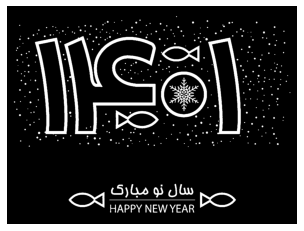

In [15]:
plt.axis('off')
plt.imshow(msg_thresh, cmap='gray')

### Encode Algorithm

In [10]:
img_mid = abs(img[:,:,0] - img[:,:,2])

for i in range(0, msg.shape[0]):
    for j in range(0, msg.shape[1]):
        
        # Encode white pixels
        if msg_thresh[i,j] == 255:
            if img_mid[i,j] % 2 == 1: # odd
                if img[i,j, 0] == 255:
                    img[i,j, 0] -= 1
                else:
                    img[i,j, 0] += 1
        
        # Encode black pixels
        if msg_thresh[i,j] == 0:
            if img_mid[i,j] % 2 == 0: # even
                if img[i,j, 0] == 0:
                    img[i,j, 0] += 1
                else:
                    img[i,j, 0] -= 1


Original image plus the hidden message


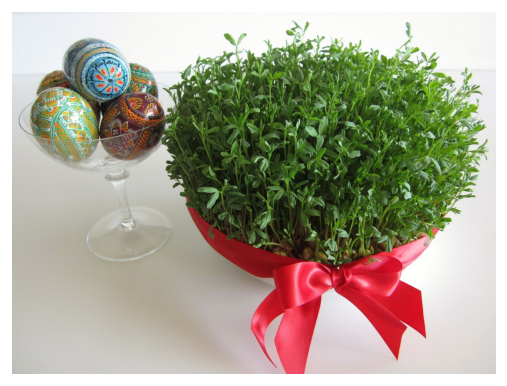

img_mid


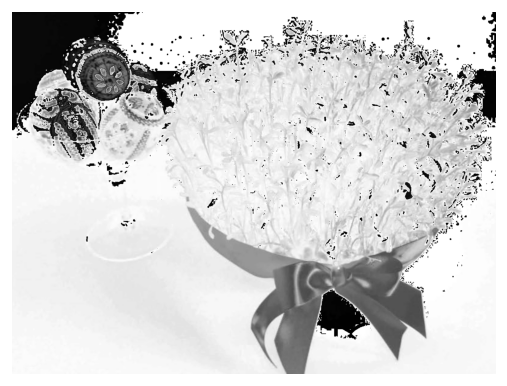

In [19]:
print("Original image plus the hidden message")
plt.figure(dpi=120)
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print("img_mid")
plt.figure(dpi=120)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_mid, cv2.COLOR_BGR2RGB))
plt.show()

### Decode Algorithm

In [13]:
img_mid = abs(img[:,:,0] - img[:,:,2])

# Decoding Result
result = np.zeros_like(img)

for i in range(0, result.shape[0]):
    for j in range(0, result.shape[1]):
        if img_mid[i,j] % 2 == 0:
            # if even --> white
            result[i,j] = 255.0
        else:
            # if odd --> black
            result[i,j] = 0.0



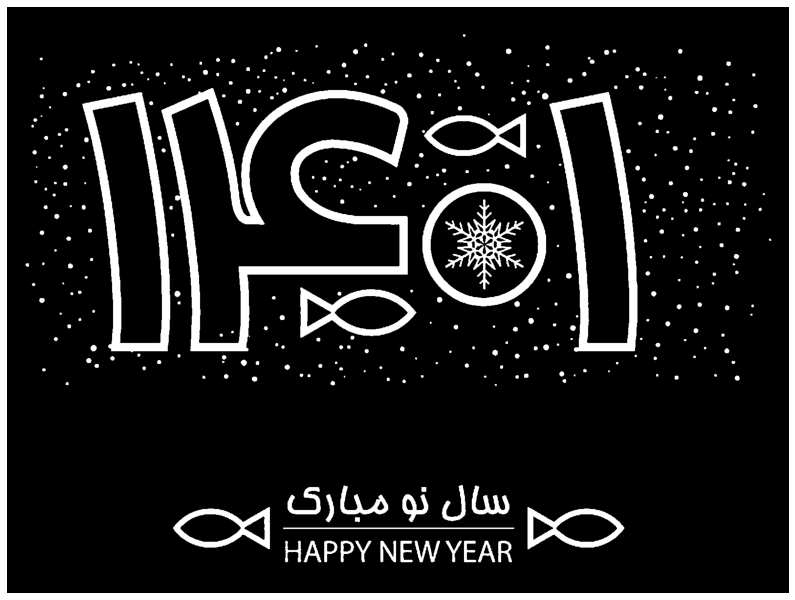

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.axis('off')
ax.imshow(result)
plt.show()